In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
candy = gpd.read_file('../data/state-by-state-favorite-halloween-candy.geojson')
print(candy.crs)
candy.head( )

epsg:4326


,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry
0,Florida,Reese's Peanut Butter Cups,543529,FL,Snickers,194117,Skittles,660000,"MULTIPOLYGON (((-82.98339 24.60263, -82.98624 ..."
1,Kansas,Dubble Bubble Gum,210375,KS,Reese's Peanut Butter Cups,111375,M&M's,247500,"POLYGON ((-102.04521 38.69757, -102.04521 38.7..."
2,New York,Reese's Peanut Butter Cups,95047,NY,Candy Corn,39603,Sour Patch Kids,198016,"MULTIPOLYGON (((-74.04657 40.68964, -74.04675 ..."
3,Washington,Hershey Kisses,171211,WA,Tootsie Pops,61147,Salt Water Taffy,207900,"POLYGON ((-123.24903 48.28431, -123.23154 48.3..."
4,California,Skittles,1188000,CA,M&M's,726000,Assorted Salt Water Taffy,1650000,"MULTIPOLYGON (((-119.63472 33.26544, -119.6363..."


### 3. Create a new column, total_pounds, to show the combined weight of 1st, 2nd, and 3rd place candies consumed by each state.

In [3]:
#add column
candy['total_pounds'] = candy['2nd_place_pounds']+candy['3rd_place_pounds']+candy['top_candy_pounds']
candy.head()   

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_pounds
0,Florida,Reese's Peanut Butter Cups,543529,FL,Snickers,194117,Skittles,660000,"MULTIPOLYGON (((-82.98339 24.60263, -82.98624 ...",1397646
1,Kansas,Dubble Bubble Gum,210375,KS,Reese's Peanut Butter Cups,111375,M&M's,247500,"POLYGON ((-102.04521 38.69757, -102.04521 38.7...",569250
2,New York,Reese's Peanut Butter Cups,95047,NY,Candy Corn,39603,Sour Patch Kids,198016,"MULTIPOLYGON (((-74.04657 40.68964, -74.04675 ...",332666
3,Washington,Hershey Kisses,171211,WA,Tootsie Pops,61147,Salt Water Taffy,207900,"POLYGON ((-123.24903 48.28431, -123.23154 48.3...",440258
4,California,Skittles,1188000,CA,M&M's,726000,Assorted Salt Water Taffy,1650000,"MULTIPOLYGON (((-119.63472 33.26544, -119.6363...",3564000


### 4. Which state consumes the most of its 1st, 2nd, and 3rd place candies combined (greatest combined weight)?

In [4]:
most_candies = candy.sort_values(by=['total_pounds'], ascending=False)
most_candies.head()
#CA, AZ, FL

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_pounds
4,California,Skittles,1188000,CA,M&M's,726000,Assorted Salt Water Taffy,1650000,"MULTIPOLYGON (((-119.63472 33.26544, -119.6363...",3564000
49,Arizona,Hot Tamales Minis,680450,AZ,Hershey Kisses,453633,Snickers,963971,"POLYGON ((-114.51645 33.02762, -114.51664 33.0...",2098054
0,Florida,Reese's Peanut Butter Cups,543529,FL,Snickers,194117,Skittles,660000,"MULTIPOLYGON (((-82.98339 24.60263, -82.98624 ...",1397646
42,Utah,Tootsie Pops,260883,UT,Reese's Peanut Butter Cups,139137,Jolly Ranchers Candy,469590,"POLYGON ((-114.04702 39.90604, -114.04713 39.9...",869610
41,Pennsylvania,Hershey's Mini Chocolate Candy Bars,269497,PA,M&M's,104804,Skittles,299442,"POLYGON ((-80.51935 41.84956, -80.51938 41.850...",673743


### 5. Which state consumes the least of its 1st, 2nd, and 3rd place candies combined (lowest combined weight)?

In [5]:
least_candies = candy.sort_values(by=['total_pounds'], ascending=True)
least_candies.head()
#CT, AK, CO

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_pounds
44,Connecticut,M&M's,1366,CT,Milky Way,910,Almond Joy,2619,"POLYGON ((-73.51808 41.66672, -73.51807 41.666...",4895
7,Alaska,Kit Kat,4012,AK,Blow Pops,3209,Twix,5082,"MULTIPOLYGON (((172.35392 52.89499, 172.34785 ...",12303
29,Colorado,Hershey Kisses,4918,CO,Milky Way,2459,Twix,5532,"POLYGON ((-109.05095 40.22265, -109.05097 40.2...",12909
46,Rhode Island,Twix,11583,RI,M&M's,7078,Candy Corn,16731,"MULTIPOLYGON (((-71.67264 41.13429, -71.67609 ...",35392
12,Oklahoma,Butterfinger,8898,OK,Dubble Bubble Gum,7415,Snickers,19279,"POLYGON ((-100.00376 36.49985, -100.00397 36.4...",35592


### 6. What is the average amount of combined candy consumed across all states? What is the median amount?

In [6]:
#mean
candy['total_pounds'].mean().astype(int)

373608

In [7]:
#median
candy['total_pounds'].median().astype(int)

191589

### 7. Read in the population data and merge it with the candy data.

In [8]:
pop = pd.read_csv('../data/population_est2017.csv')
pop.head()

,NAME,POPESTIMATE2017
0,Alabama,4874747
1,Alaska,739795
2,Arizona,7016270
3,Arkansas,3004279
4,California,39536653


In [9]:
#merge
candy_pop = pd.merge(candy, pop, left_on = 'name', right_on = 'NAME', how = 'inner')
candy_pop.tail()

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_pounds,NAME,POPESTIMATE2017
46,Rhode Island,Twix,11583,RI,M&M's,7078,Candy Corn,16731,"MULTIPOLYGON (((-71.67264 41.13429, -71.67609 ...",35392,Rhode Island,1059639
47,Hawaii,Milky Way,255984,HI,Hawaiian Host,105405,Hershey Kisses,271042,"MULTIPOLYGON (((-166.38290 23.82966, -166.3844...",632431,Hawaii,1427538
48,Oregon,Tootsie Pops,51374,OR,M&M's,36696,Reese's Peanut Butter Cups,91740,"POLYGON ((-124.06545 45.78305, -124.06206 45.7...",179810,Oregon,4142776
49,Arizona,Hot Tamales Minis,680450,AZ,Hershey Kisses,453633,Snickers,963971,"POLYGON ((-114.51645 33.02762, -114.51664 33.0...",2098054,Arizona,7016270
50,South Dakota,Almond Joy,19569,SD,Jolly Ranchers Candy,6179,Starburst,27809,"POLYGON ((-100.49937 45.94365, -100.48192 45.9...",53557,South Dakota,869666


### 8. Calculate a new column, per_capita to show the average weight (total pounds) consumed per person in each state.

In [10]:
candy_pop['per_capita']=candy_pop['total_pounds']/candy_pop['POPESTIMATE2017']
candy_pop.head()

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_pounds,NAME,POPESTIMATE2017,per_capita
0,Florida,Reese's Peanut Butter Cups,543529,FL,Snickers,194117,Skittles,660000,"MULTIPOLYGON (((-82.98339 24.60263, -82.98624 ...",1397646,Florida,20984400,0.066604
1,Kansas,Dubble Bubble Gum,210375,KS,Reese's Peanut Butter Cups,111375,M&M's,247500,"POLYGON ((-102.04521 38.69757, -102.04521 38.7...",569250,Kansas,2913123,0.195409
2,New York,Reese's Peanut Butter Cups,95047,NY,Candy Corn,39603,Sour Patch Kids,198016,"MULTIPOLYGON (((-74.04657 40.68964, -74.04675 ...",332666,New York,19849399,0.016759
3,Washington,Hershey Kisses,171211,WA,Tootsie Pops,61147,Salt Water Taffy,207900,"POLYGON ((-123.24903 48.28431, -123.23154 48.3...",440258,Washington,7405743,0.059448
4,California,Skittles,1188000,CA,M&M's,726000,Assorted Salt Water Taffy,1650000,"MULTIPOLYGON (((-119.63472 33.26544, -119.6363...",3564000,California,39536653,0.090144


### 9. Which state has the greatest consumption of its 1st, 2nd, and 3rd place candies per capita?

In [11]:
max_candy= candy_pop.sort_values(by=['per_capita'], ascending=False)
max_candy.head()
#HI 0.443022

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_pounds,NAME,POPESTIMATE2017,per_capita
47,Hawaii,Milky Way,255984,HI,Hawaiian Host,105405,Hershey Kisses,271042,"MULTIPOLYGON (((-166.38290 23.82966, -166.3844...",632431,Hawaii,1427538,0.443022
49,Arizona,Hot Tamales Minis,680450,AZ,Hershey Kisses,453633,Snickers,963971,"POLYGON ((-114.51645 33.02762, -114.51664 33.0...",2098054,Arizona,7016270,0.299027
42,Utah,Tootsie Pops,260883,UT,Reese's Peanut Butter Cups,139137,Jolly Ranchers Candy,469590,"POLYGON ((-114.04702 39.90604, -114.04713 39.9...",869610,Utah,3101833,0.280354
35,North Dakota,Candy Corn,55510,ND,Jolly Ranchers Candy,44408,Hot Tamales,70313,"POLYGON ((-104.04537 47.33013, -104.04537 47.3...",170231,North Dakota,755393,0.225354
11,Nevada,Skittles,184827,NV,Candy Corn,127957,Hershey Kisses,341220,"POLYGON ((-119.32418 41.99385, -119.32362 41.9...",654004,Nevada,2998039,0.218144


### 10. For this state, what is the consumption per capita for each of the top-3 candies?

In [12]:
hawaii=candy_pop[candy_pop['name'].isin(['Hawaii'])]
hawaii

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_pounds,NAME,POPESTIMATE2017,per_capita
47,Hawaii,Milky Way,255984,HI,Hawaiian Host,105405,Hershey Kisses,271042,"MULTIPOLYGON (((-166.38290 23.82966, -166.3844...",632431,Hawaii,1427538,0.443022


In [13]:
hawaii_top=hawaii['top_candy_pounds']/hawaii['POPESTIMATE2017']
hawaii_top
# 0.189867 lbs.

47    0.189867
dtype: float64

In [14]:
hawaii_2=hawaii['2nd_place_pounds']/hawaii['POPESTIMATE2017']
hawaii_2
# 0.179319 lbs.

47    0.179319
dtype: float64

In [15]:
hawaii_3=hawaii['3rd_place_pounds']/hawaii['POPESTIMATE2017']
hawaii_3
# 0.073837 lbs.

47    0.073837
dtype: float64

### 11. Which candy shows up most frequently (look at the 1st, 2nd, and 3rd place candies combined) in the dataset? One way you could do this is to create three lists from the DataFrame columns and concatenate them. You could iterate through this list and create a dictionary of counts. You could also use the Counter() method from the collections package.

In [16]:
candy_pop_1 = candy_pop['top_candy'].value_counts()
candy_pop_1 = candy_pop_1.to_frame().reset_index()
candy_pop_1 = candy_pop_1.rename(columns = {'index':'candy', 'top_candy':'top_count'})
candy_pop_1.head()

,candy,top_count
0,Candy Corn,5
1,Reese's Peanut Butter Cups,5
2,Milky Way,3
3,Skittles,3
4,Hot Tamales,3


In [17]:
candy_pop_2 = candy_pop['2nd_place'].value_counts()
candy_pop_2 = candy_pop_2.to_frame().reset_index()
candy_pop_2 = candy_pop_2.rename(columns = {'index':'candy', '2nd_place':'2nd_count'})
candy_pop_2.head()

,candy,2nd_count
0,M&M's,8
1,Snickers,4
2,Reese's Peanut Butter Cups,4
3,Skittles,4
4,Starburst,4


In [18]:
candy_pop_3 = candy_pop['3rd_place'].value_counts()
candy_pop_3 = candy_pop_3.to_frame().reset_index()
candy_pop_3 = candy_pop_3.rename(columns = {'index':'candy', '3rd_place':'3rd_count'})
candy_pop_3.head()

,candy,3rd_count
0,Skittles,6
1,M&M's,5
2,Candy Corn,4
3,Butterfinger,4
4,Reese's Peanut Butter Cups,3


In [19]:
#merge df's
#merge collegeplaying, schools and people
top_candies = candy_pop_1.merge(candy_pop_2,on='candy', how = 'outer').merge(candy_pop_3,on='candy', how = 'outer')
top_candies.head()

,candy,top_count,2nd_count,3rd_count
0,Candy Corn,5.0,3.0,4.0
1,Reese's Peanut Butter Cups,5.0,4.0,3.0
2,Milky Way,3.0,3.0,2.0
3,Skittles,3.0,4.0,6.0
4,Hot Tamales,3.0,NaN,NaN


In [20]:
#change null values to 0
top_candies['top_count'] = top_candies['top_count'].fillna(0)
top_candies['2nd_count'] = top_candies['2nd_count'].fillna(0)
top_candies['3rd_count'] = top_candies['3rd_count'].fillna(0)

In [21]:
top_candies['most']=top_candies['top_count']+top_candies['2nd_count']+top_candies['3rd_count']
top_candies = top_candies.sort_values(by=['most'], ascending=False)
top_candies.head()
#answer: M&M's, Skittles, Reese's Peanut Butter Cups

,candy,top_count,2nd_count,3rd_count,most
5,M&M's,3.0,8.0,5.0,16.0
3,Skittles,3.0,4.0,6.0,13.0
0,Candy Corn,5.0,3.0,4.0,12.0
1,Reese's Peanut Butter Cups,5.0,4.0,3.0,12.0
7,Tootsie Pops,3.0,3.0,3.0,9.0


### 12. Make a bar plot to show the number of times each candy appears in in the dataset (regardless of place).

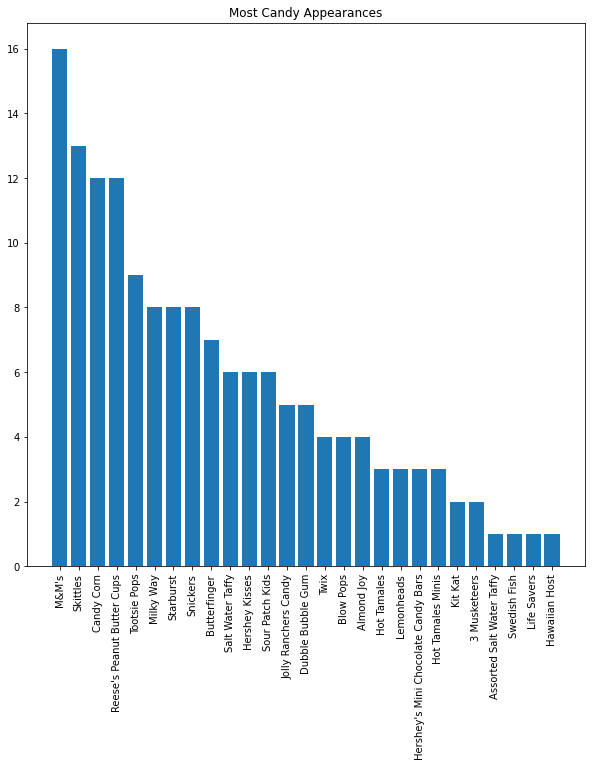

In [30]:
plt.figure(figsize=(10,10))
plt.bar('candy', 'most', data = top_candies)
plt.xticks(rotation = 90)
plt.title('Most Candy Appearances');

### OPTIONAL BONUS: Which candies only appear once in the dataset? Which states have them in their top 3?

In [23]:
once=top_candies[top_candies['most'].isin(['1.0'])]
once

,candy,top_count,2nd_count,3rd_count,most
14,Assorted Salt Water Taffy,1.0,0.0,0.0,1.0
15,Swedish Fish,1.0,0.0,0.0,1.0
16,Life Savers,1.0,0.0,0.0,1.0
25,Hawaiian Host,0.0,1.0,0.0,1.0


In [24]:
state= candy_pop[candy_pop['top_candy'].isin(['Swedish Fish', 'Life Savers', 'Assorted Salt Water Taffy', 'Hawaiian Host'])]
state

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_pounds,NAME,POPESTIMATE2017,per_capita
4,California,Skittles,1188000,CA,M&M's,726000,Assorted Salt Water Taffy,1650000,"MULTIPOLYGON (((-119.63472 33.26544, -119.6363...",3564000,California,39536653,0.090144
8,Georgia,Lemonheads,88136,GA,Hershey Kisses,38559,Swedish Fish,148731,"POLYGON ((-85.38658 33.90172, -85.38659 33.901...",275426,Georgia,10429379,0.026409
39,Delaware,Candy Corn,17061,DE,Skittles,8530,Life Savers,19905,"POLYGON ((-75.76007 39.29682, -75.76010 39.297...",45496,Delaware,961939,0.047296


In [25]:
state_2= candy_pop[candy_pop['2nd_place'].isin(['Swedish Fish', 'Life Savers', 'Assorted Salt Water Taffy', 'Hawaiian Host'])]
state_2

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_pounds,NAME,POPESTIMATE2017,per_capita
47,Hawaii,Milky Way,255984,HI,Hawaiian Host,105405,Hershey Kisses,271042,"MULTIPOLYGON (((-166.38290 23.82966, -166.3844...",632431,Hawaii,1427538,0.443022


In [26]:
state = pd.concat([state, state_2])
state
#answer CA, GA, DE, HI

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_pounds,NAME,POPESTIMATE2017,per_capita
4,California,Skittles,1188000,CA,M&M's,726000,Assorted Salt Water Taffy,1650000,"MULTIPOLYGON (((-119.63472 33.26544, -119.6363...",3564000,California,39536653,0.090144
8,Georgia,Lemonheads,88136,GA,Hershey Kisses,38559,Swedish Fish,148731,"POLYGON ((-85.38658 33.90172, -85.38659 33.901...",275426,Georgia,10429379,0.026409
39,Delaware,Candy Corn,17061,DE,Skittles,8530,Life Savers,19905,"POLYGON ((-75.76007 39.29682, -75.76010 39.297...",45496,Delaware,961939,0.047296
47,Hawaii,Milky Way,255984,HI,Hawaiian Host,105405,Hershey Kisses,271042,"MULTIPOLYGON (((-166.38290 23.82966, -166.3844...",632431,Hawaii,1427538,0.443022


### OPTIONAL BONUS 2: plot a simple choropleth of candy consumption per capita for states.

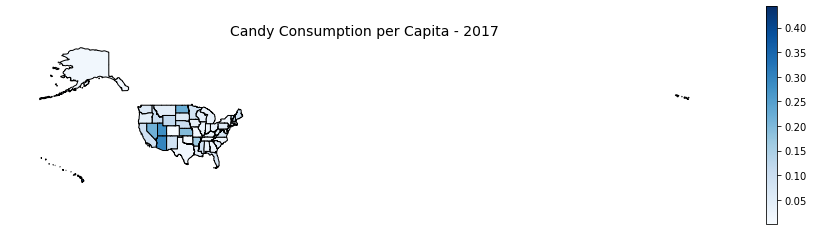

In [31]:
fig, ax = plt.subplots(figsize=(16,4))
candy_pop.plot(column = 'per_capita', 
              cmap = 'Blues', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Candy Consumption per Capita - 2017', fontsize = 14)
ax.axis('off');